references：
https://openaccess.thecvf.com/content_ECCV_2018/papers/Sanghyun_Woo_Convolutional_Block_Attention_ECCV_2018_paper.pdf
https://colab.research.google.com/drive/1U2cbuk9JHyuctTKAHQ1fJqRliCayhDBp#scrollTo=Q-hZ1yQCzr5d
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/(VGG)

https://androidkt.com/how-to-use-vgg-model-in-tensorflow-keras/

https://www.kaggle.com/code/hafizurrahman/flower-classification-resnet50-transfer-learning/notebook


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
#from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/My Drive/flower"))

['sample_submission.csv', 'README.md', 'cat_to_name.json', 'dataset']


In [3]:
labels = ["pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"]

In [4]:
import tensorflow as tf

In [5]:
num_classes = len(set(labels))
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Create model
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model
from tensorflow.python.keras import optimizers

sgd = tf.keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
train_folder = '/content/drive/My Drive/flower/dataset/train'

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    train_folder,
    target_size=(image_size, image_size),
    batch_size=24,
    class_mode='categorical',
    subset='training'
    )
validation_generator = data_generator.flow_from_directory(
    train_folder,
    target_size=(image_size, image_size),
    batch_size=24,
    class_mode='categorical',
    subset='validation'
    )

Found 5283 images belonging to 102 classes.
Found 1269 images belonging to 102 classes.


In [7]:
NUM_EPOCHS = 20
EARLY_STOP_PATIENCE = 5

In [8]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5',
                                  monitor = 'val_loss',
                                  save_best_only = True,
                                  mode = 'auto')

In [ ]:
import math

fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=NUM_EPOCHS
    #callbacks=[cb_checkpointer, cb_early_stopper]
)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 221s 24s/step - loss: 4.9769 - accuracy: 0.0167 - val_loss: 4.5567 - val_accuracy: 0.0542
Epoch 2/20
10/10 [==============================] - 217s 24s/step - loss: 4.5906 - accuracy: 0.0458 - val_loss: 4.4040 - val_accuracy: 0.0333
Epoch 3/20
10/10 [==============================] - 214s 24s/step - loss: 4.4107 - accuracy: 0.0625 - val_loss: 4.2752 - val_accuracy: 0.0458
Epoch 4/20
10/10 [==============================] - 217s 24s/step - loss: 4.2883 - accuracy: 0.0792 - val_loss: 4.0716 - val_accuracy: 0.1375
Epoch 5/20
10/10 [==============================] - 196s 22s/step - loss: 4.1796 - accuracy: 0.1292 - val_loss: 3.9609 - val_accuracy: 0.1435
Epoch 6/20
10/10 [==============================] - 103s 11s/step - loss: 3.8878 - accuracy: 0.1500 - val_loss: 3.7343 - val_accuracy: 0.2083
Epoch 7/20
10/10 [==============================] - 106s 11s/step - loss: 3.9434 - accuracy: 0.1542 - val_loss: 3.6789 - val_accuracy: 0.1708
Epoch 

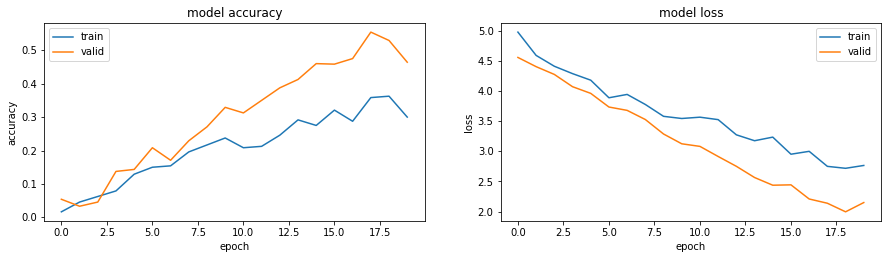

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from imutils import paths
from keras import regularizers

# Fine Tuning

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 102)               26214     
Total params: 24,138,470
Trainable params: 550,758
Non-trainable params: 23,587,712
_________________________________________________________________


In [25]:
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(102, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=NUM_EPOCHS
    #callbacks=[cb_checkpointer, cb_early_stopper]
)

<ipython-input-25-9f72d7933781>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/20
10/10 [==============================] - 151s 16s/step - loss: 4.7596 - accuracy: 0.0625 - val_loss: 10.0948 - val_accuracy: 0.0458
Epoch 2/20
10/10 [==============================] - 114s 12s/step - loss: 4.5662 - accuracy: 0.1083 - val_loss: 450.5762 - val_accuracy: 0.0042
Epoch 3/20
10/10 [==============================] - 112s 11s/step - loss: 4.4441 - accuracy: 0.1042 - val_loss: 3539.7966 - val_accuracy: 0.0125
Epoch 4/20
10/10 [==============================] - 102s 10s/step - loss: 4.3006 - accuracy: 0.1167 - val_loss: 337.1580 - val_accuracy: 0.0417
Epoch 5/20
10/10 [==============================] - 110s 11s/step - loss: 4.3480 - accuracy: 0.1083 - val_loss: 677.1861 - val_accuracy: 0.0208
Epoch 6/20
10/10 [==============================] - 96s 9s/step - loss: 4.3035 - accuracy: 0.0958 - val_loss: 1062.7035 - val_accuracy: 0.0458
Epoch 7/20
10/10 [==============================] - 101s 10s/step - loss: 4.2447 - accuracy: 0.1042 - val_loss: 663.0712 - val_accuracy: 

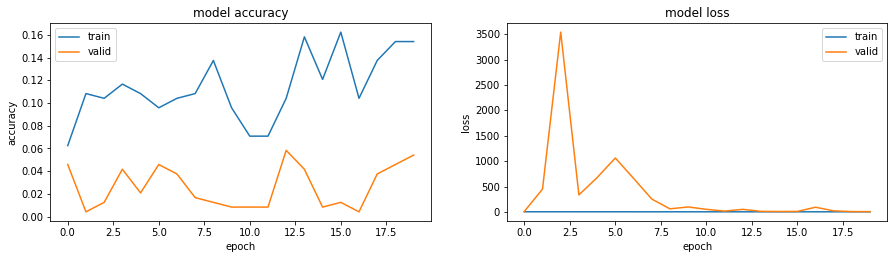

In [26]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()